In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### &emsp; The purpose of this work is to segregate customers into different demographics and learn how to market to each group. To group these different demographics we will use the following clustering algorithms: K-Means, Hierarchical Agglomerative Clustering, and DBSCAN. The data set consists of 18 different features on the credit card usage of 8950 customers. The features are as described below

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE :Tenure of credit card service for user

# Data Exploration and Cleaning

In [3]:
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
print(df.shape)
df.head(10)

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
## Drop 'CUST_ID' because it is irrelevant
df = df.drop(['CUST_ID'], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

#### &emsp; All of the data types are either integers or floats, therefore no encoding will be needed later. Next we will fill in missing values with the averages of their respective columns

In [10]:
## fill in missing values with mean values for 'MINIMUM_PAYMENTS'
df['MINIMUM_PAYMENTS'].fillna(value=df['MINIMUM_PAYMENTS'].mean(), inplace = True)

## fill in missing values with mean values for 'CREDIT_LIMIT'
df['CREDIT_LIMIT'].fillna(value=df['CREDIT_LIMIT'].mean(), inplace = True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


<AxesSubplot:>

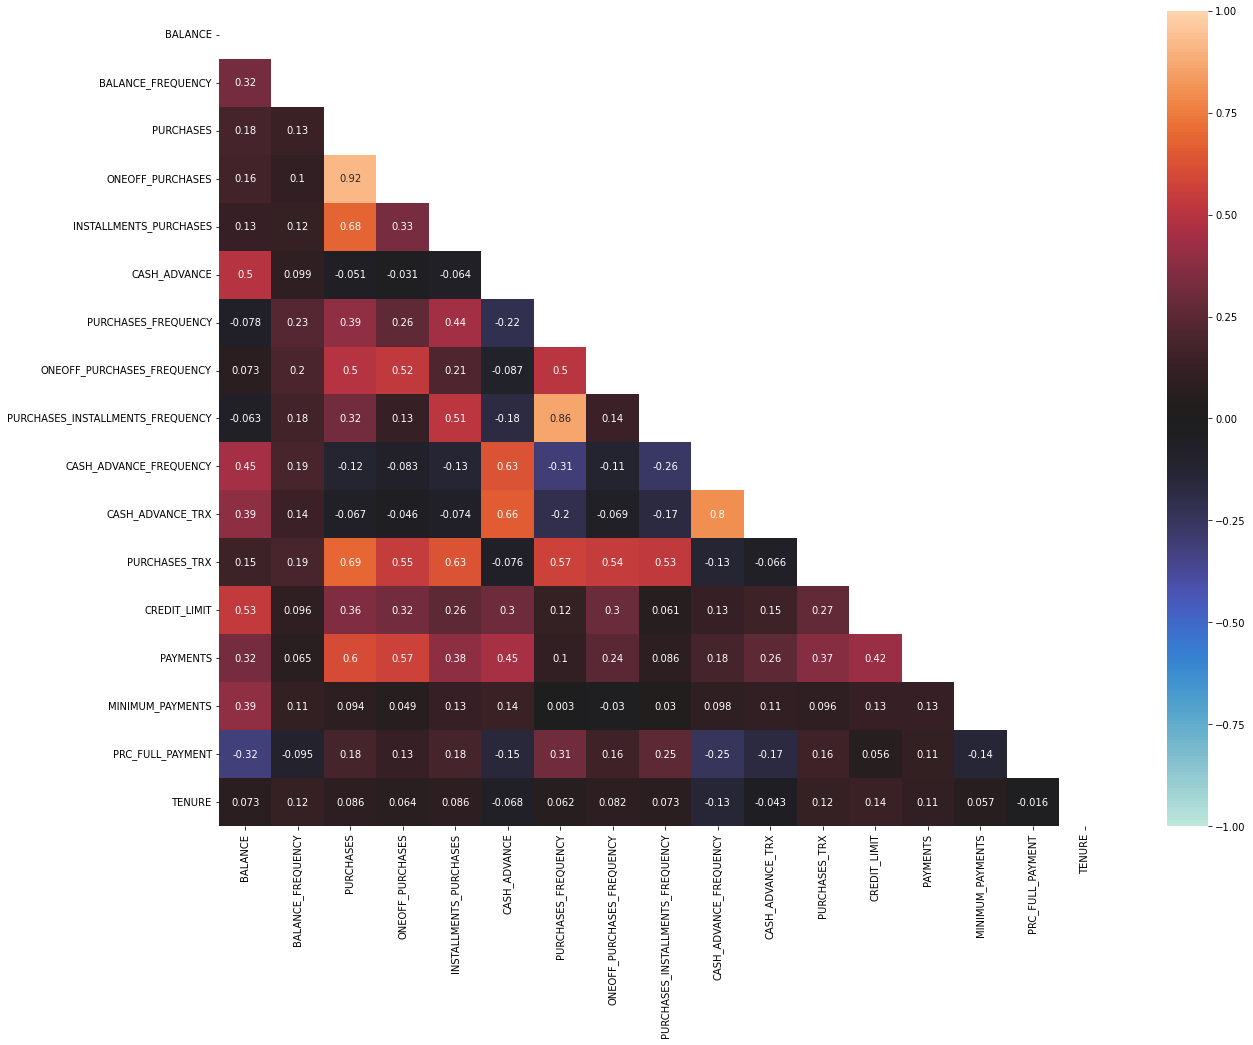

In [11]:
plt.figure(figsize=(20,15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'icefire', mask = matrix)

#### &emsp; From this heatmap, we see that there is a high correlation between 'ONEOFF_PURCHASES' and PURCHASES, 'PURCHASES_INSTALLMENTS_FREQUENCY' and 'PURCHASES_FREQUENCY', and 'CASH_ADVANCE_TRX' and 'CASH_ADVANCE_FREQUENCY'.

#### Examine the skewed values and transform them

In [14]:
float_columns = [x for x in df.columns if x not in  ['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']]

In [15]:
skew_columns = (df[float_columns].skew().sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

MINIMUM_PAYMENTS              13.867357
ONEOFF_PURCHASES              10.045083
PURCHASES                      8.144269
INSTALLMENTS_PURCHASES         7.299120
PAYMENTS                       5.907620
CASH_ADVANCE                   5.166609
BALANCE                        2.393386
PRC_FULL_PAYMENT               1.942820
CASH_ADVANCE_FREQUENCY         1.828686
ONEOFF_PURCHASES_FREQUENCY     1.535613
CREDIT_LIMIT                   1.522549
dtype: float64

In [16]:
# Perform a Log transform on skewed columns
for col in skew_columns.index.tolist():
    df[col] = np.log1p(df[col])

#### Perform feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df[float_columns] = mm.fit_transform(df[float_columns])

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.379045,0.818182,0.422994,0.000000,0.455879,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,0.466811,0.490324,0.438874,0.000000,12
1,0.819116,0.909091,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,4,0,0.771814,0.767919,0.620013,0.289506,12
2,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,0.782631,0.593925,0.572303,0.000000,12
3,0.752871,0.636364,0.677125,0.688918,0.000000,0.495472,0.083333,0.115477,0.000000,0.087355,1,1,0.782631,0.000000,0.600809,0.000000,12
4,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.083333,0.115477,0.000000,0.000000,0,1,0.495375,0.601905,0.488693,0.000000,12


#### Pairplots

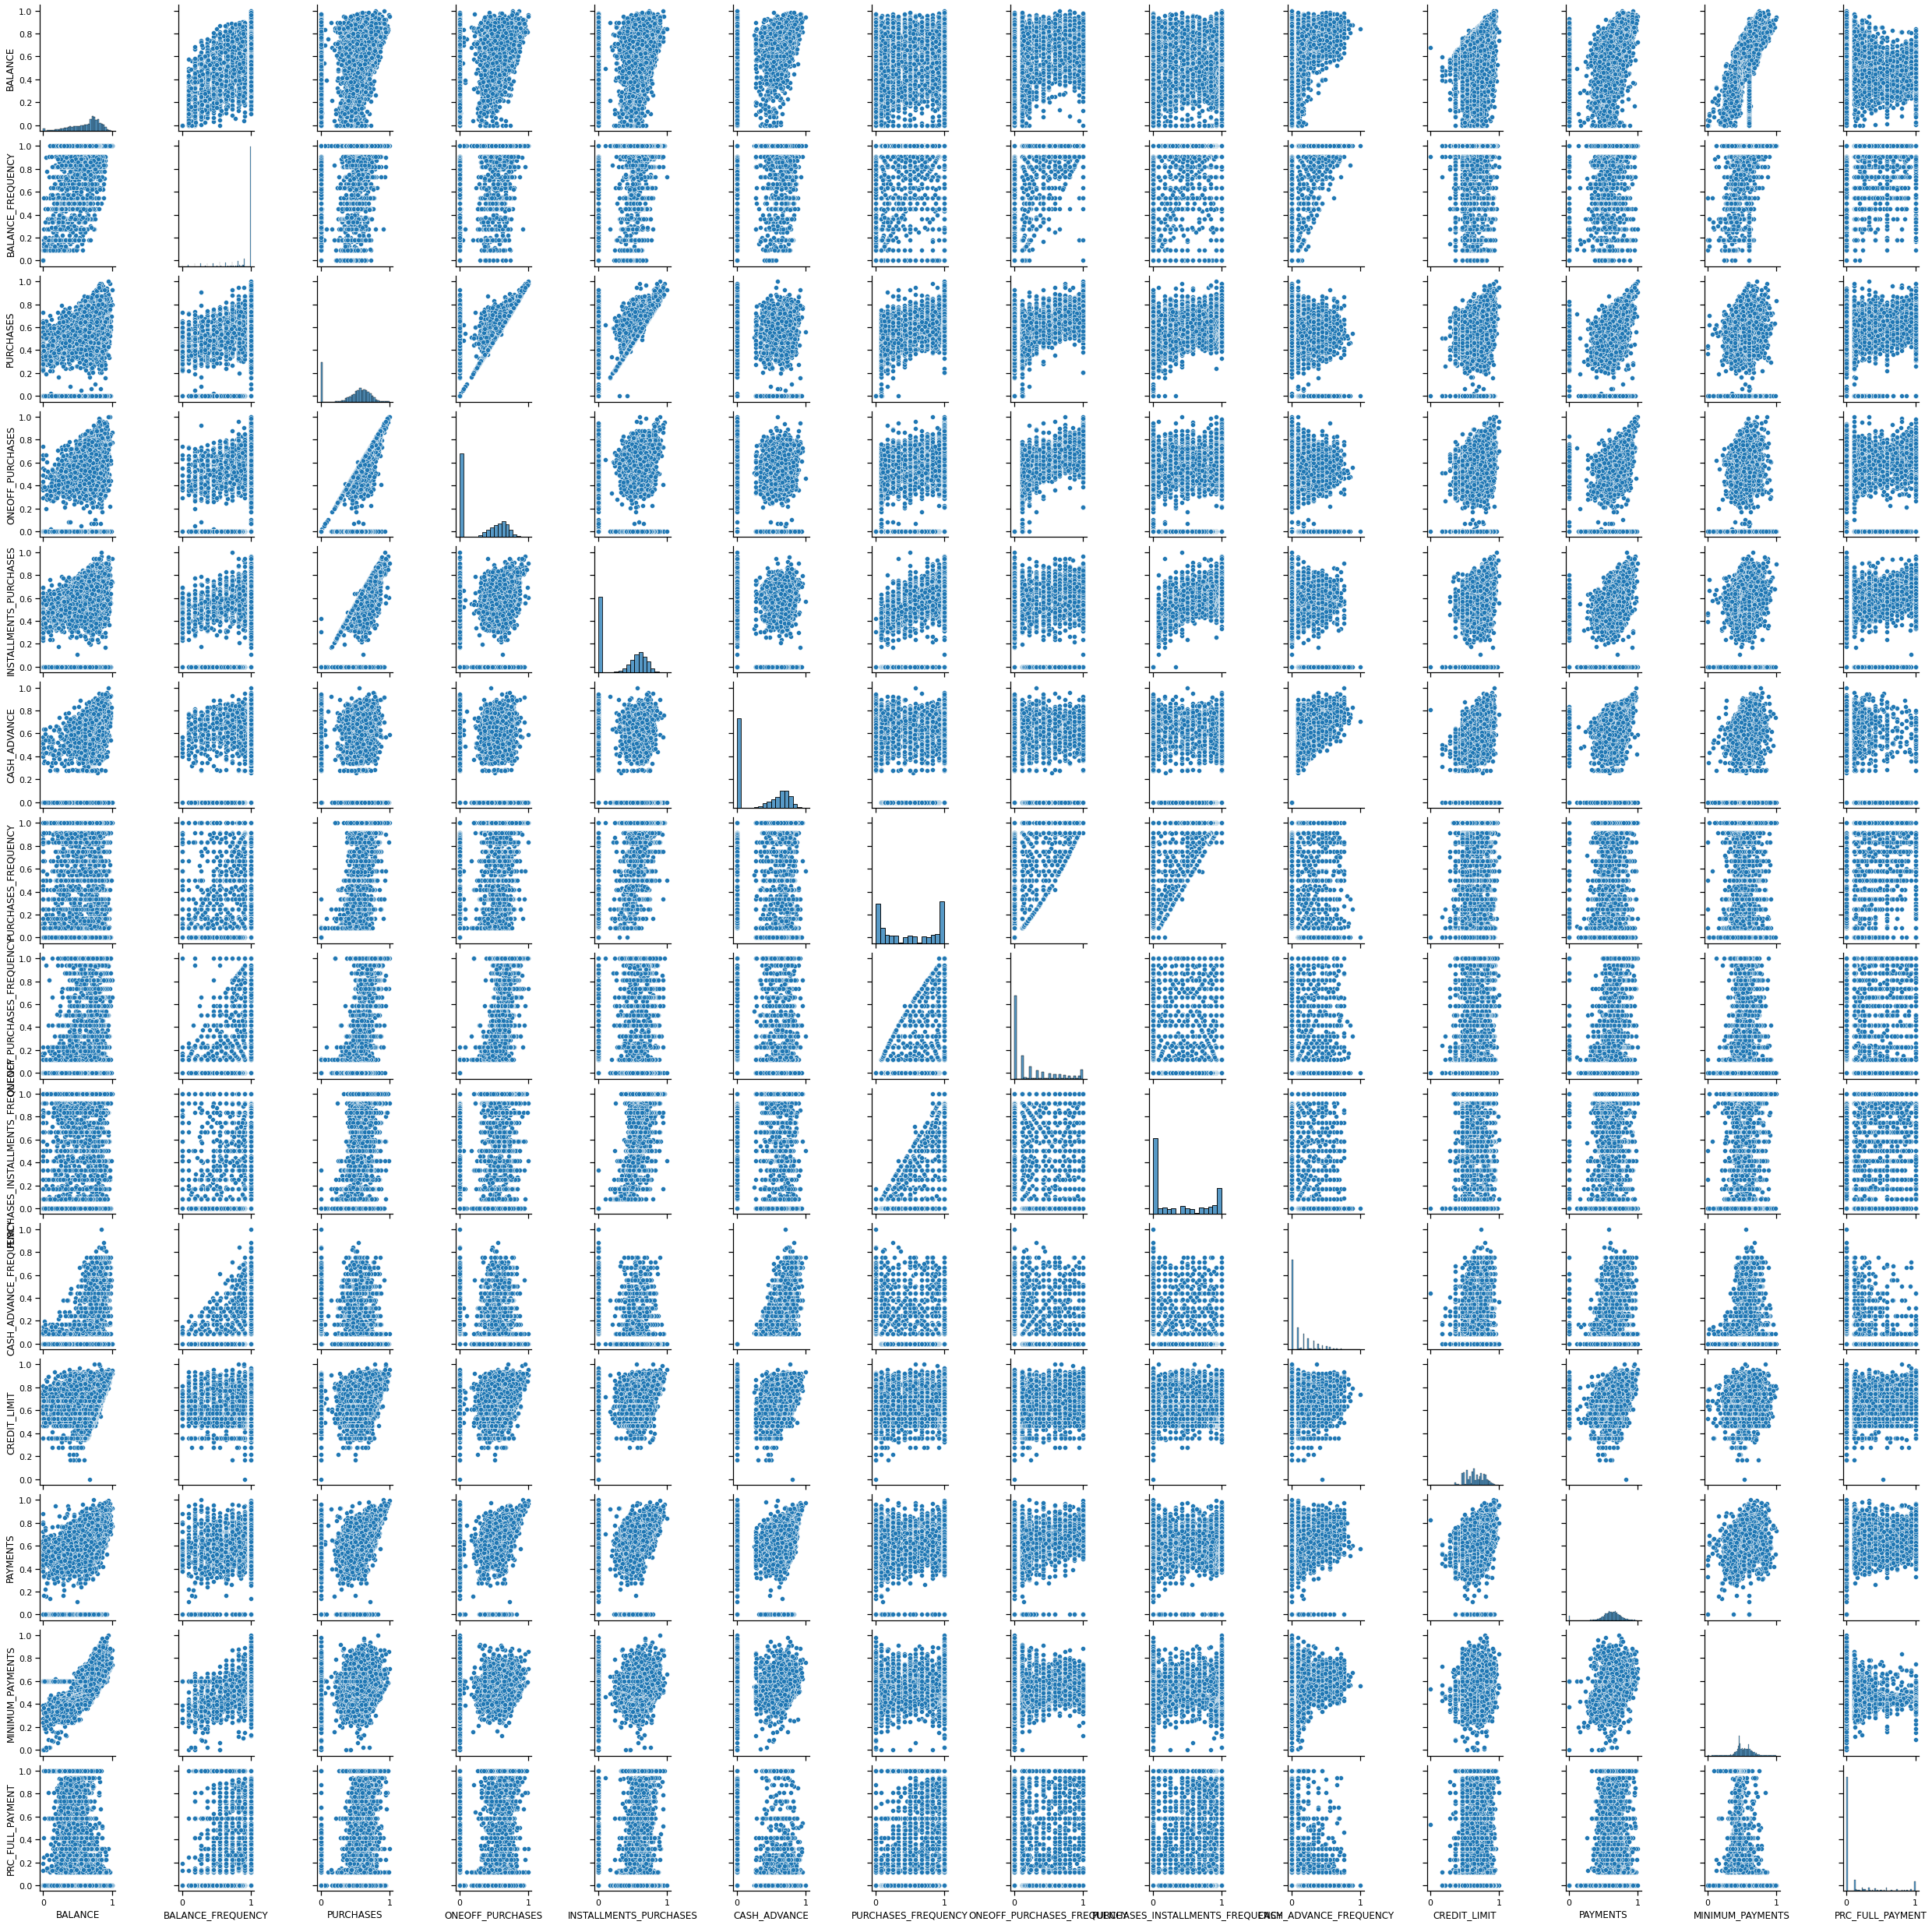

In [18]:
sns.set_context('notebook')
sns.pairplot(df[float_columns])

In [ ]:
## Check for unique values of categorical variables
#df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
#df_uniques

# K-Means Clustering

#### &emsp; We will now use K-Means to group similar clusters together, but before we do that, we must determine the number of clusters before hand. Both the Elbow Method and Silhouette Scores will be used to determine this.

In [19]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

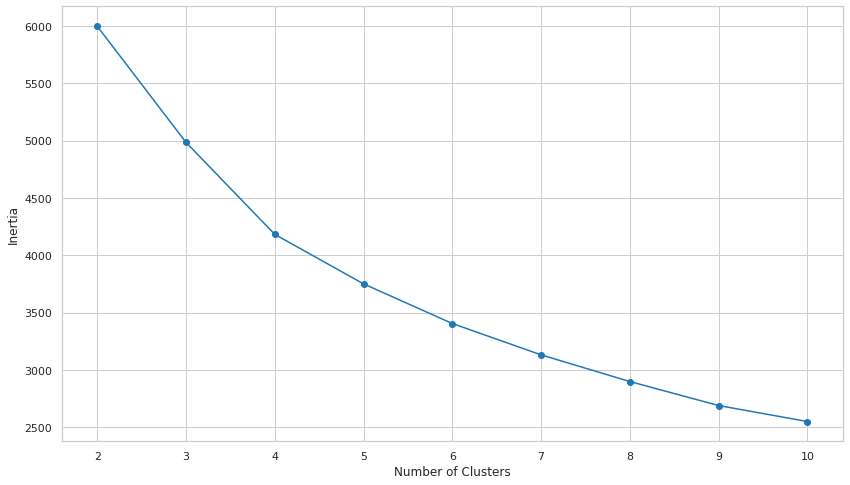

In [20]:
## Determine the number of clusters with the Elbow Method
k_data = df
inertia = []
list_num_clusters = list(range(2,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(k_data[float_columns])
    inertia.append(km.inertia_)
    
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

#### Determine the Silhouette Score

In [22]:
from sklearn.metrics import silhouette_score

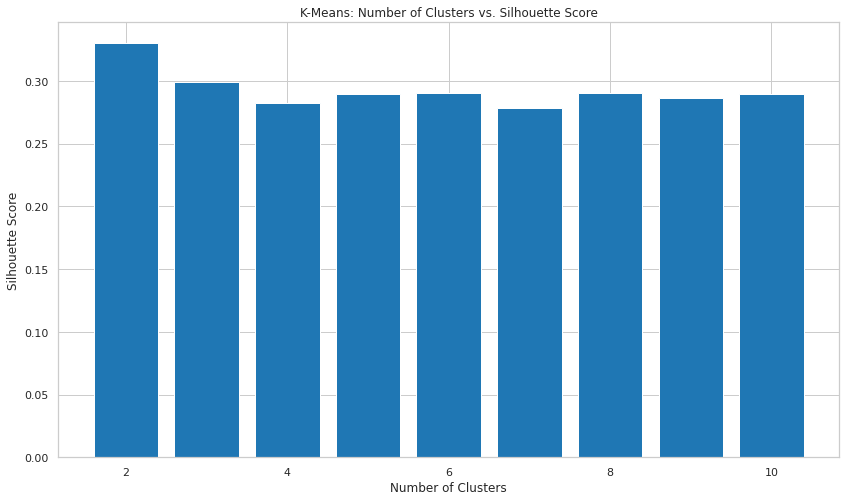

In [23]:
silhouette_scores = []

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(k_data[float_columns], KMeans(n_clusters = n_cluster).fit_predict(k_data[float_columns])))
    
k = list(range(2, 11))
plt.figure(figsize=(14,8))
plt.bar(k, silhouette_scores)
plt.title('K-Means: Number of Clusters vs. Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### &emsp; The hinge in the Elbow Method seems to appear between 6 to 8 clusters, but the highest silhouette scores are at 2, 3, and 6 in that descending order. 6 clusters will be used in this analysis as a middle ground for these two methods.

In [24]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
y_kmeans = kmeans.fit_predict(k_data[float_columns])
k_data = np.concatenate((y_kmeans.reshape(len(y_kmeans),1), k_data), axis = 1)

In [25]:
k_data =  pd.DataFrame(data=k_data, columns=['Cluster_Num','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])

In [26]:
k_data.head(10)

,Cluster_Num,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.0,0.379045,0.818182,0.422994,0.000000,0.455879,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,0.466811,0.490324,0.438874,0.000000,12.0
1,1.0,0.819116,0.909091,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,4.0,0.0,0.771814,0.767919,0.620013,0.289506,12.0
2,4.0,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,0.782631,0.593925,0.572303,0.000000,12.0
3,4.0,0.752871,0.636364,0.677125,0.688918,0.000000,0.495472,0.083333,0.115477,0.000000,0.087355,1.0,1.0,0.782631,0.000000,0.600809,0.000000,12.0
4,4.0,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.083333,0.115477,0.000000,0.000000,0.0,1.0,0.495375,0.601905,0.488693,0.000000,12.0
5,0.0,0.761229,1.000000,0.666285,0.000000,0.718084,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,0.558912,0.668719,0.692007,0.000000,12.0
6,2.0,0.653807,1.000000,0.820962,0.825643,0.652189,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,64.0,0.874793,0.808284,0.469909,1.000000,12.0
7,0.0,0.762000,1.000000,0.562978,0.000000,0.606746,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,0.597331,0.602004,0.557656,0.000000,12.0
8,4.0,0.702577,1.000000,0.625886,0.611935,0.529202,0.000000,0.333333,0.115477,0.250000,0.000000,0.0,5.0,0.771814,0.603246,0.510217,0.000000,12.0
9,4.0,0.510620,0.545455,0.662628,0.674169,0.000000,0.000000,0.166667,0.222393,0.000000,0.000000,0.0,3.0,0.842682,0.651750,0.409727,0.000000,12.0


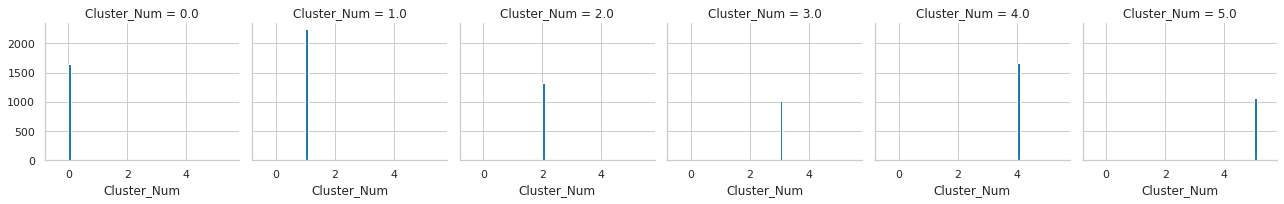

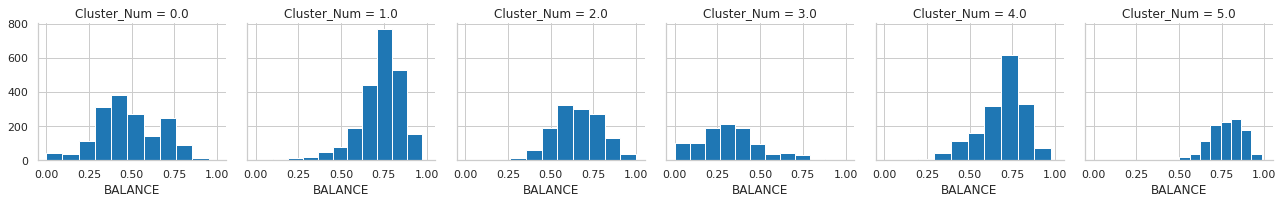

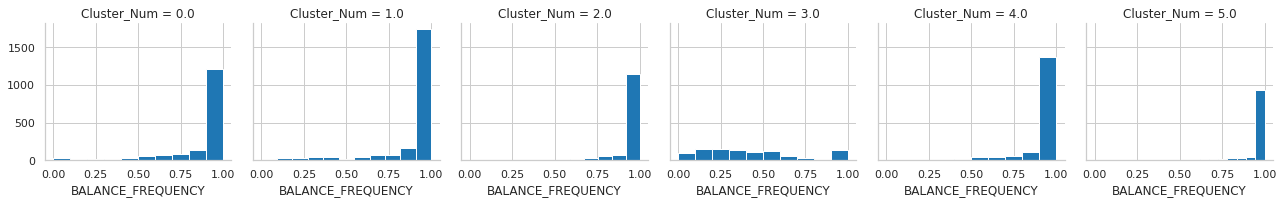

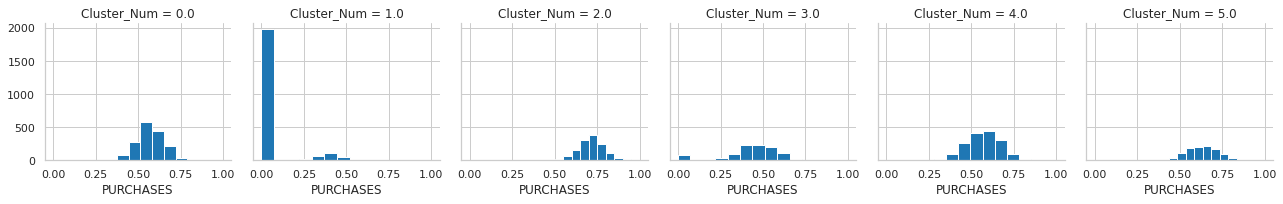

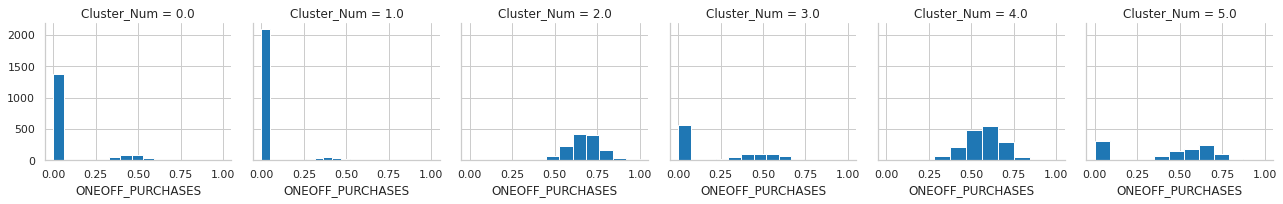

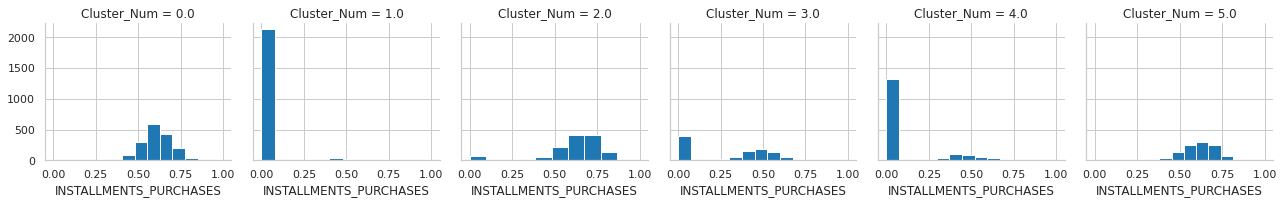

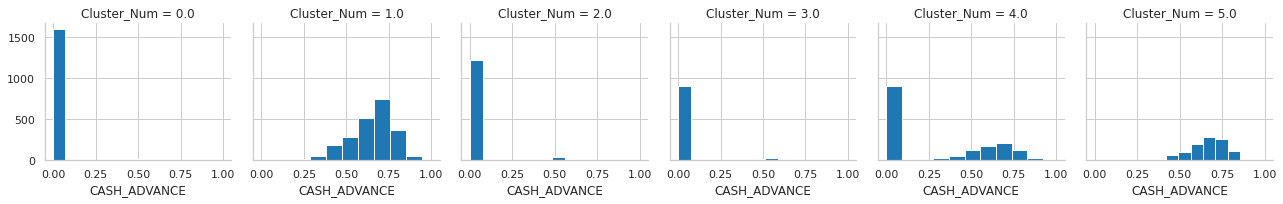

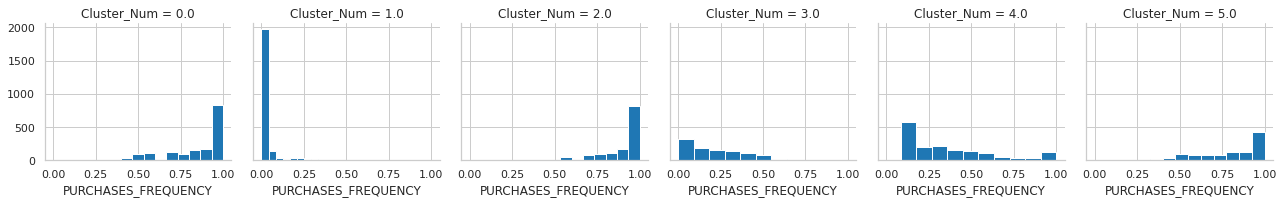

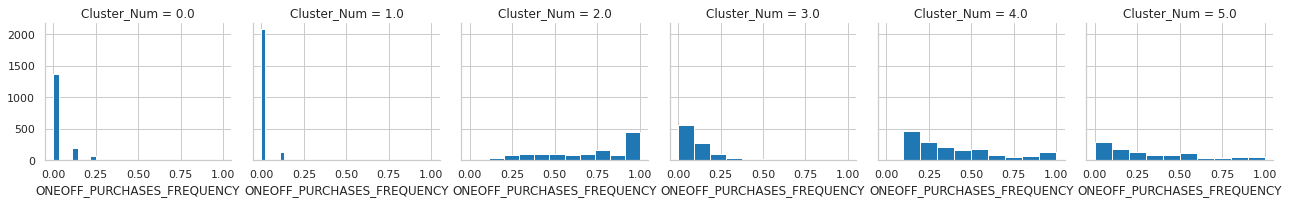

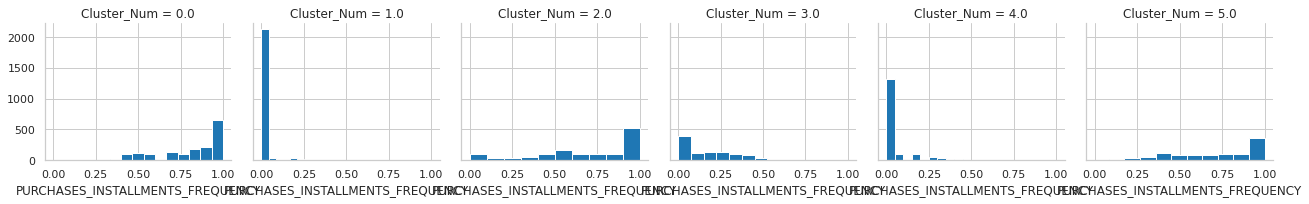

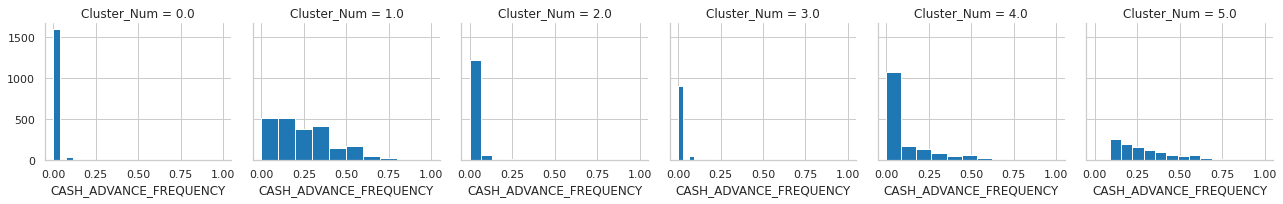

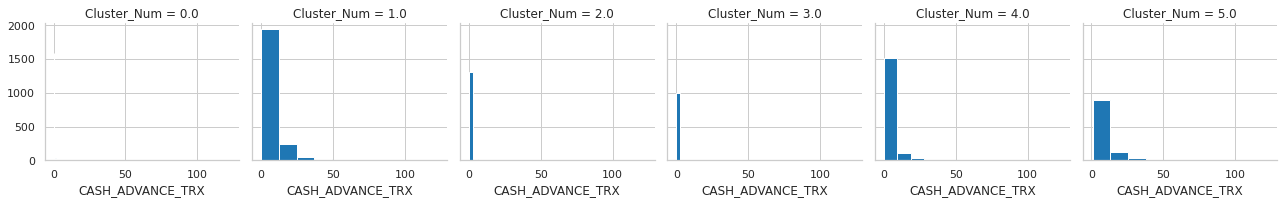

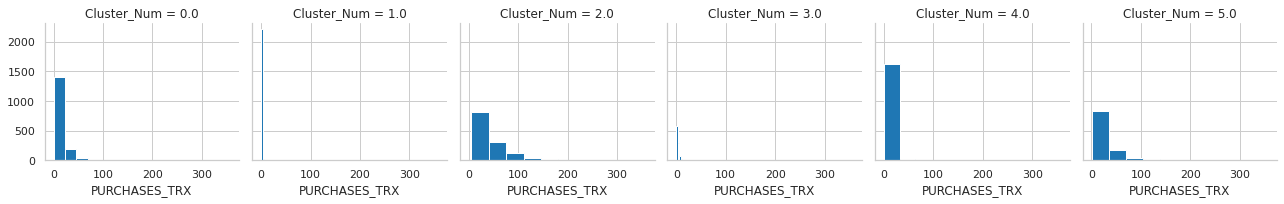

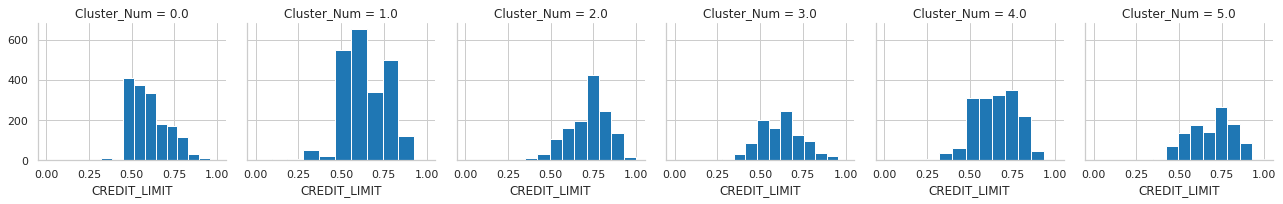

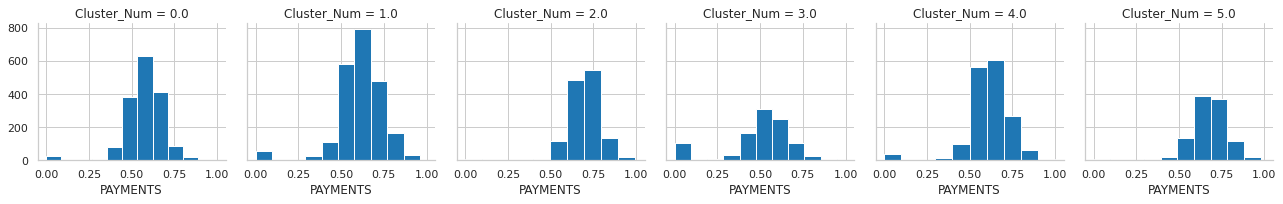

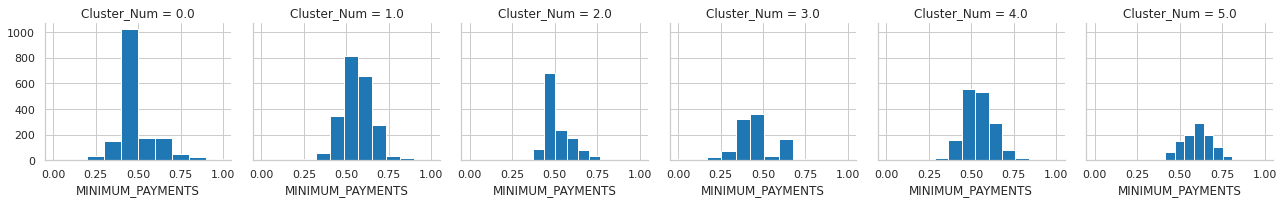

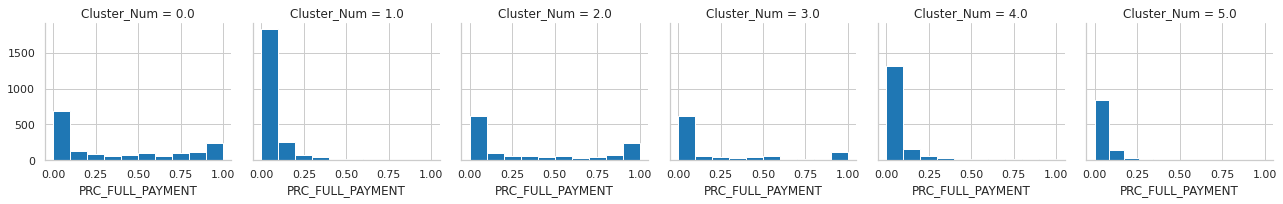

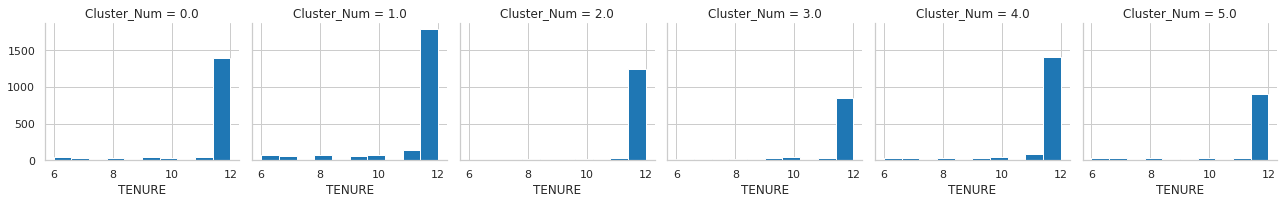

In [27]:
for n in k_data:
    grid = sns.FacetGrid(k_data, col = 'Cluster_Num')
    grid.map(plt.hist, n)
    plt.show()

In [29]:
k_data.groupby(['Cluster_Num']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster_Num,,,,,,,,,,,,,,,,,
0.0,0.478638,0.890946,0.571979,0.075015,0.611856,0.013565,0.860480,0.026119,0.820792,0.003446,0.042553,15.878419,0.601813,0.572836,0.483220,0.357129,11.474772
1.0,0.731842,0.911228,0.045642,0.026008,0.022305,0.644443,0.017033,0.009163,0.008803,0.260831,6.721231,0.245317,0.642042,0.611819,0.561279,0.042488,11.368421
2.0,0.656206,0.973410,0.718571,0.677863,0.622867,0.041888,0.920100,0.696986,0.688908,0.011993,0.217949,44.625943,0.726344,0.696299,0.515790,0.336421,11.825792
3.0,0.320555,0.441468,0.435906,0.218685,0.291910,0.052649,0.233445,0.086122,0.157197,0.012088,0.213082,3.559960,0.624104,0.495015,0.444948,0.231030,11.497522
4.0,0.689627,0.942866,0.570108,0.571770,0.093411,0.285969,0.365634,0.388670,0.039443,0.115977,2.891566,8.208434,0.651162,0.609891,0.542213,0.068254,11.539759
5.0,0.776762,0.975330,0.634770,0.422466,0.619836,0.664810,0.816862,0.308369,0.706175,0.278722,8.084270,26.770599,0.692307,0.677242,0.603046,0.042048,11.496255


### The following observations can be made from the results of the K-Means

<b>Cluster 0:<b> Group that makes frequent purchases, but not large ones and likes to pay off in installments

<b>Cluster 1:<b> Group that does not make alot of purchases and do not make big purchases, Likes to pay things upfront all at once
    
<b>Cluster 2:<b> Group that spends the most often, significantly higher than the other groups, makes big purchases in installments
    
<b>Cluster 3:<b> Group with the lowest average balance, and gets paid/spend the least
    
<b>Cluster 4:<b> Likes to pay things upfront all at once
    
<b>Cluster 5:<b> Group with the highest average balance, likes to pay off items/services over time with big cash advances. Most likely to pay the minimum over time

# Hierarchical Agglomerative Clustering

#### &emsp; We will again cluster the preprocessed data, but this time hierarchical agglomerative clustering will be used. We will again use 6 clusters as an input parameter.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg_data = df
agg = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_agg = agg.fit_predict(agg_data[float_columns])
agg_data = np.concatenate((y_agg.reshape(len(y_agg),1), agg_data), axis = 1)

In [ ]:
agg_data =  pd.DataFrame(data=agg_data, columns=['Cluster_Num','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])

In [ ]:
agg_data.head(10)

In [ ]:
for n in agg_data:
    grid = sns.FacetGrid(agg_data, col = 'Cluster_Num')
    grid.map(plt.hist, n)
    plt.show()

In [ ]:
agg_data.groupby(['Cluster_Num']).mean()

### The following observations can be made about the results of this clustering method

<b>Cluster 0:<b> Least likely to do installment purchases and does not spend alot of money

<b>Cluster 1:<b> Group with the lowest balance and makes alot of small purchases but is highly likely to pay on full
    
<b>Cluster 2:<b> Group will most likely only use card only for large purchases on a regular basis, usually no cash advances and highly likely to pay in full
    
<b>Cluster 3:<b> Group with a high balance and likes to save money, will give large cash advance
    
<b>Cluster 4:<b> Group with the highest balance, will give largest cash advance, and a large amount of purchases
    
<b>Cluster 5:<b> Unlikely to give any cash advances

# DBSCAN

#### Finally we will attempt to cluster these groups again with the DBSCAN clustering aglorithm

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbs_data = df
dbs = DBSCAN(eps = .4, min_samples = 20)
y_dbs = dbs.fit_predict(dbs_data[float_columns])
dbs_data = np.concatenate((y_dbs.reshape(len(y_dbs),1), dbs_data), axis = 1)

In [ ]:
dbs_data =  pd.DataFrame(data=dbs_data, columns=['Cluster_Num','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])

In [ ]:
dbs_data.head(10)

In [ ]:
for n in dbs_data:
    grid = sns.FacetGrid(dbs_data, col = 'Cluster_Num')
    grid.map(plt.hist, n)
    plt.show()

#### &emsp; Many values were tested for epsilon and the minimum number of sample points however none of them gave results that were better than the one above. It seems like DBSCAN is not a good clustering algorithm for this data set as the majority of the observations are fit into one group.

# Conclusion

#### &emsp; The K-Means and Agglomerative Clustering algorithms both gives slightly different but equal results where they each broke the data set into 6 subgroups and we were able to obtain key insights about each group. The DBSCAN, on the other hand, was unable to properly split up the data set into smaller groups and therefore no key insights were able to made using it. In this case, We highly recommend either the K-Means or Agglomerative Clustering Method and dissuade others from using the DBSCAN.